In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
df = pd.read_csv(r'D:\COURSE\RAKAMIN\JAP PROGRAM\VIX IDX Partner\loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df = df.drop(columns=['Unnamed: 0','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
                      'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','open_rv_24m','max_bal_bc',
                      'all_util','inq_fi','total_cu_tl','inq_last_12m'])
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [5]:
# # Mengubah kolom 'term' menjadi integer dalam kolom baru 'term_month'
# df['term_month'] = df['term'].str.extract('(\d+)').astype(int)

# # Hapus kolom 'term' jika tidak lagi dibutuhkan
# df.drop('term', axis=1, inplace=True)

# Eksploratory Data Analysis

In [6]:
nums = [    'id',    'member_id',    'loan_amnt',    'funded_amnt',    'funded_amnt_inv',    'int_rate',    'installment',    'annual_inc',    'dti',    'delinq_2yrs',    'inq_last_6mths',
        'mths_since_last_delinq',    'mths_since_last_record',    'open_acc',    'pub_rec',    'revol_bal',    'revol_util',    'total_acc',    'out_prncp',    'out_prncp_inv',    'total_pymnt',
            'total_pymnt_inv',    'total_rec_prncp',    'total_rec_int',    'total_rec_late_fee',    'recoveries',    'collection_recovery_fee',    'last_pymnt_amnt',    'collections_12_mths_ex_med',
            'mths_since_last_major_derog',    'policy_code',    'acc_now_delinq',    'tot_coll_amt',    'tot_cur_bal',    'total_rev_hi_lim',]


cats = ['term', 'grade',    'sub_grade',    'emp_title',    'emp_length',    'home_ownership',    'verification_status',    
        'issue_d',    'loan_status',    'pymnt_plan',    'url',    'desc',    'purpose',    'title',    'zip_code',    
        'addr_state',    'initial_list_status',    'application_type']

cats_2 = ['term', 'grade',    'sub_grade',    'emp_length',    'home_ownership',    'verification_status',    'issue_d',    'loan_status',
        'pymnt_plan',    'purpose','addr_state',    'initial_list_status',    'application_type']

times = [   'earliest_cr_line',   'last_pymnt_d',   'next_pymnt_d',   'last_credit_pull_d']

df[nums].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [7]:
df[cats].nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
desc                   124435
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [8]:
df[cats_2].nunique()

term                    2
grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
issue_d                91
loan_status             9
pymnt_plan              2
purpose                14
addr_state             50
initial_list_status     2
application_type        1
dtype: int64

In [9]:
df[cats_2].describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
count,466285,466285,466285,445277,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,11,6,3,91,9,2,14,50,2,1
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Oct-14,Current,n,debt_consolidation,CA,f,INDIVIDUAL
freq,337953,136929,31686,150049,235875,168055,38782,224226,466276,274195,71450,303005,466285


In [10]:
df[times].describe()

,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,466256,465909,239071,466243
unique,664,98,100,103
top,Oct-00,Jan-16,Feb-16,Jan-16
freq,3674,179620,208393,327699


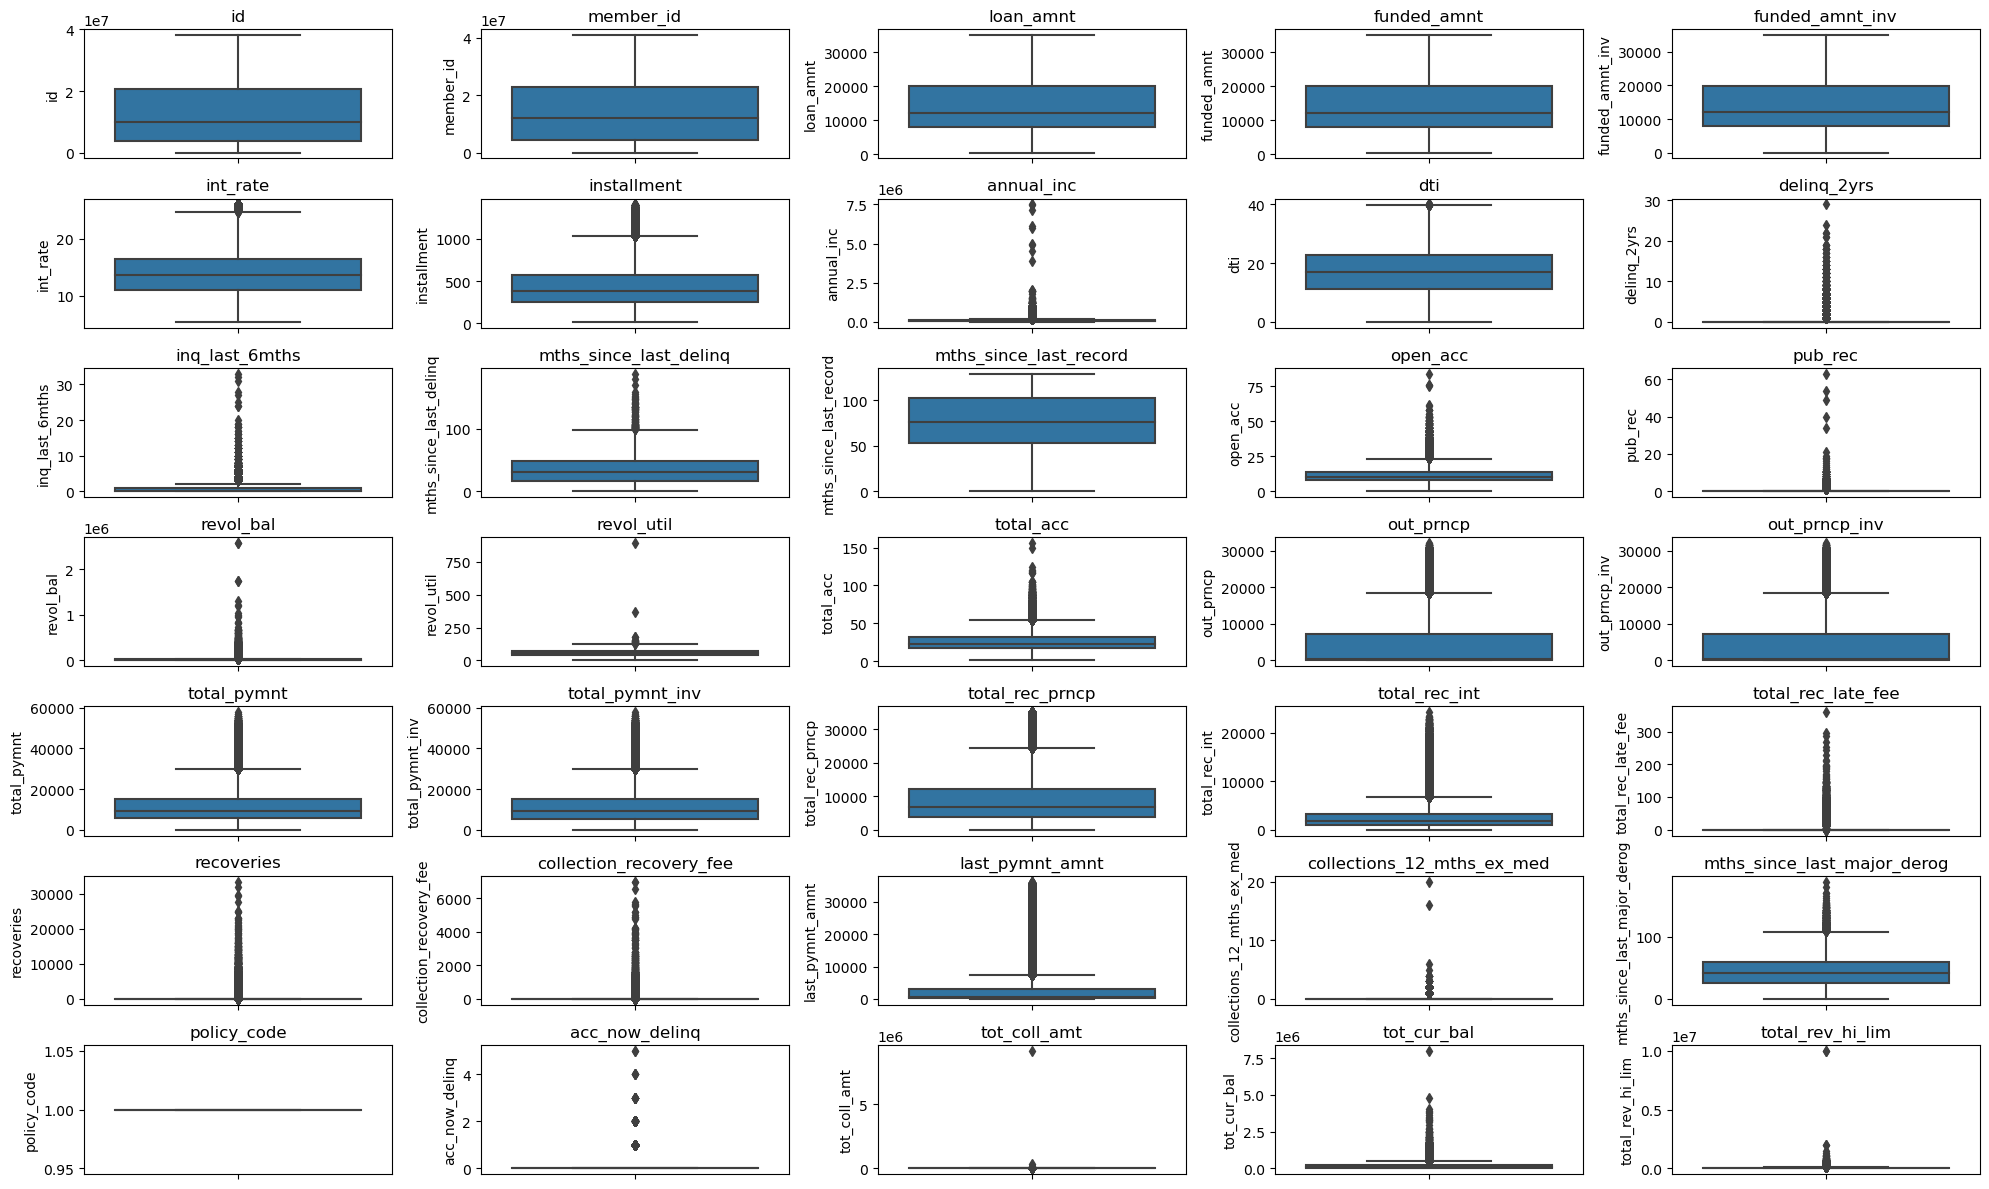

In [11]:
plt.figure(figsize=(20,12))

for i in range(len(nums)):
    plt.subplot(7,5, i+1)
    sns.boxplot(y=df[nums[i]])
    plt.title(nums[i])

plt.tight_layout()

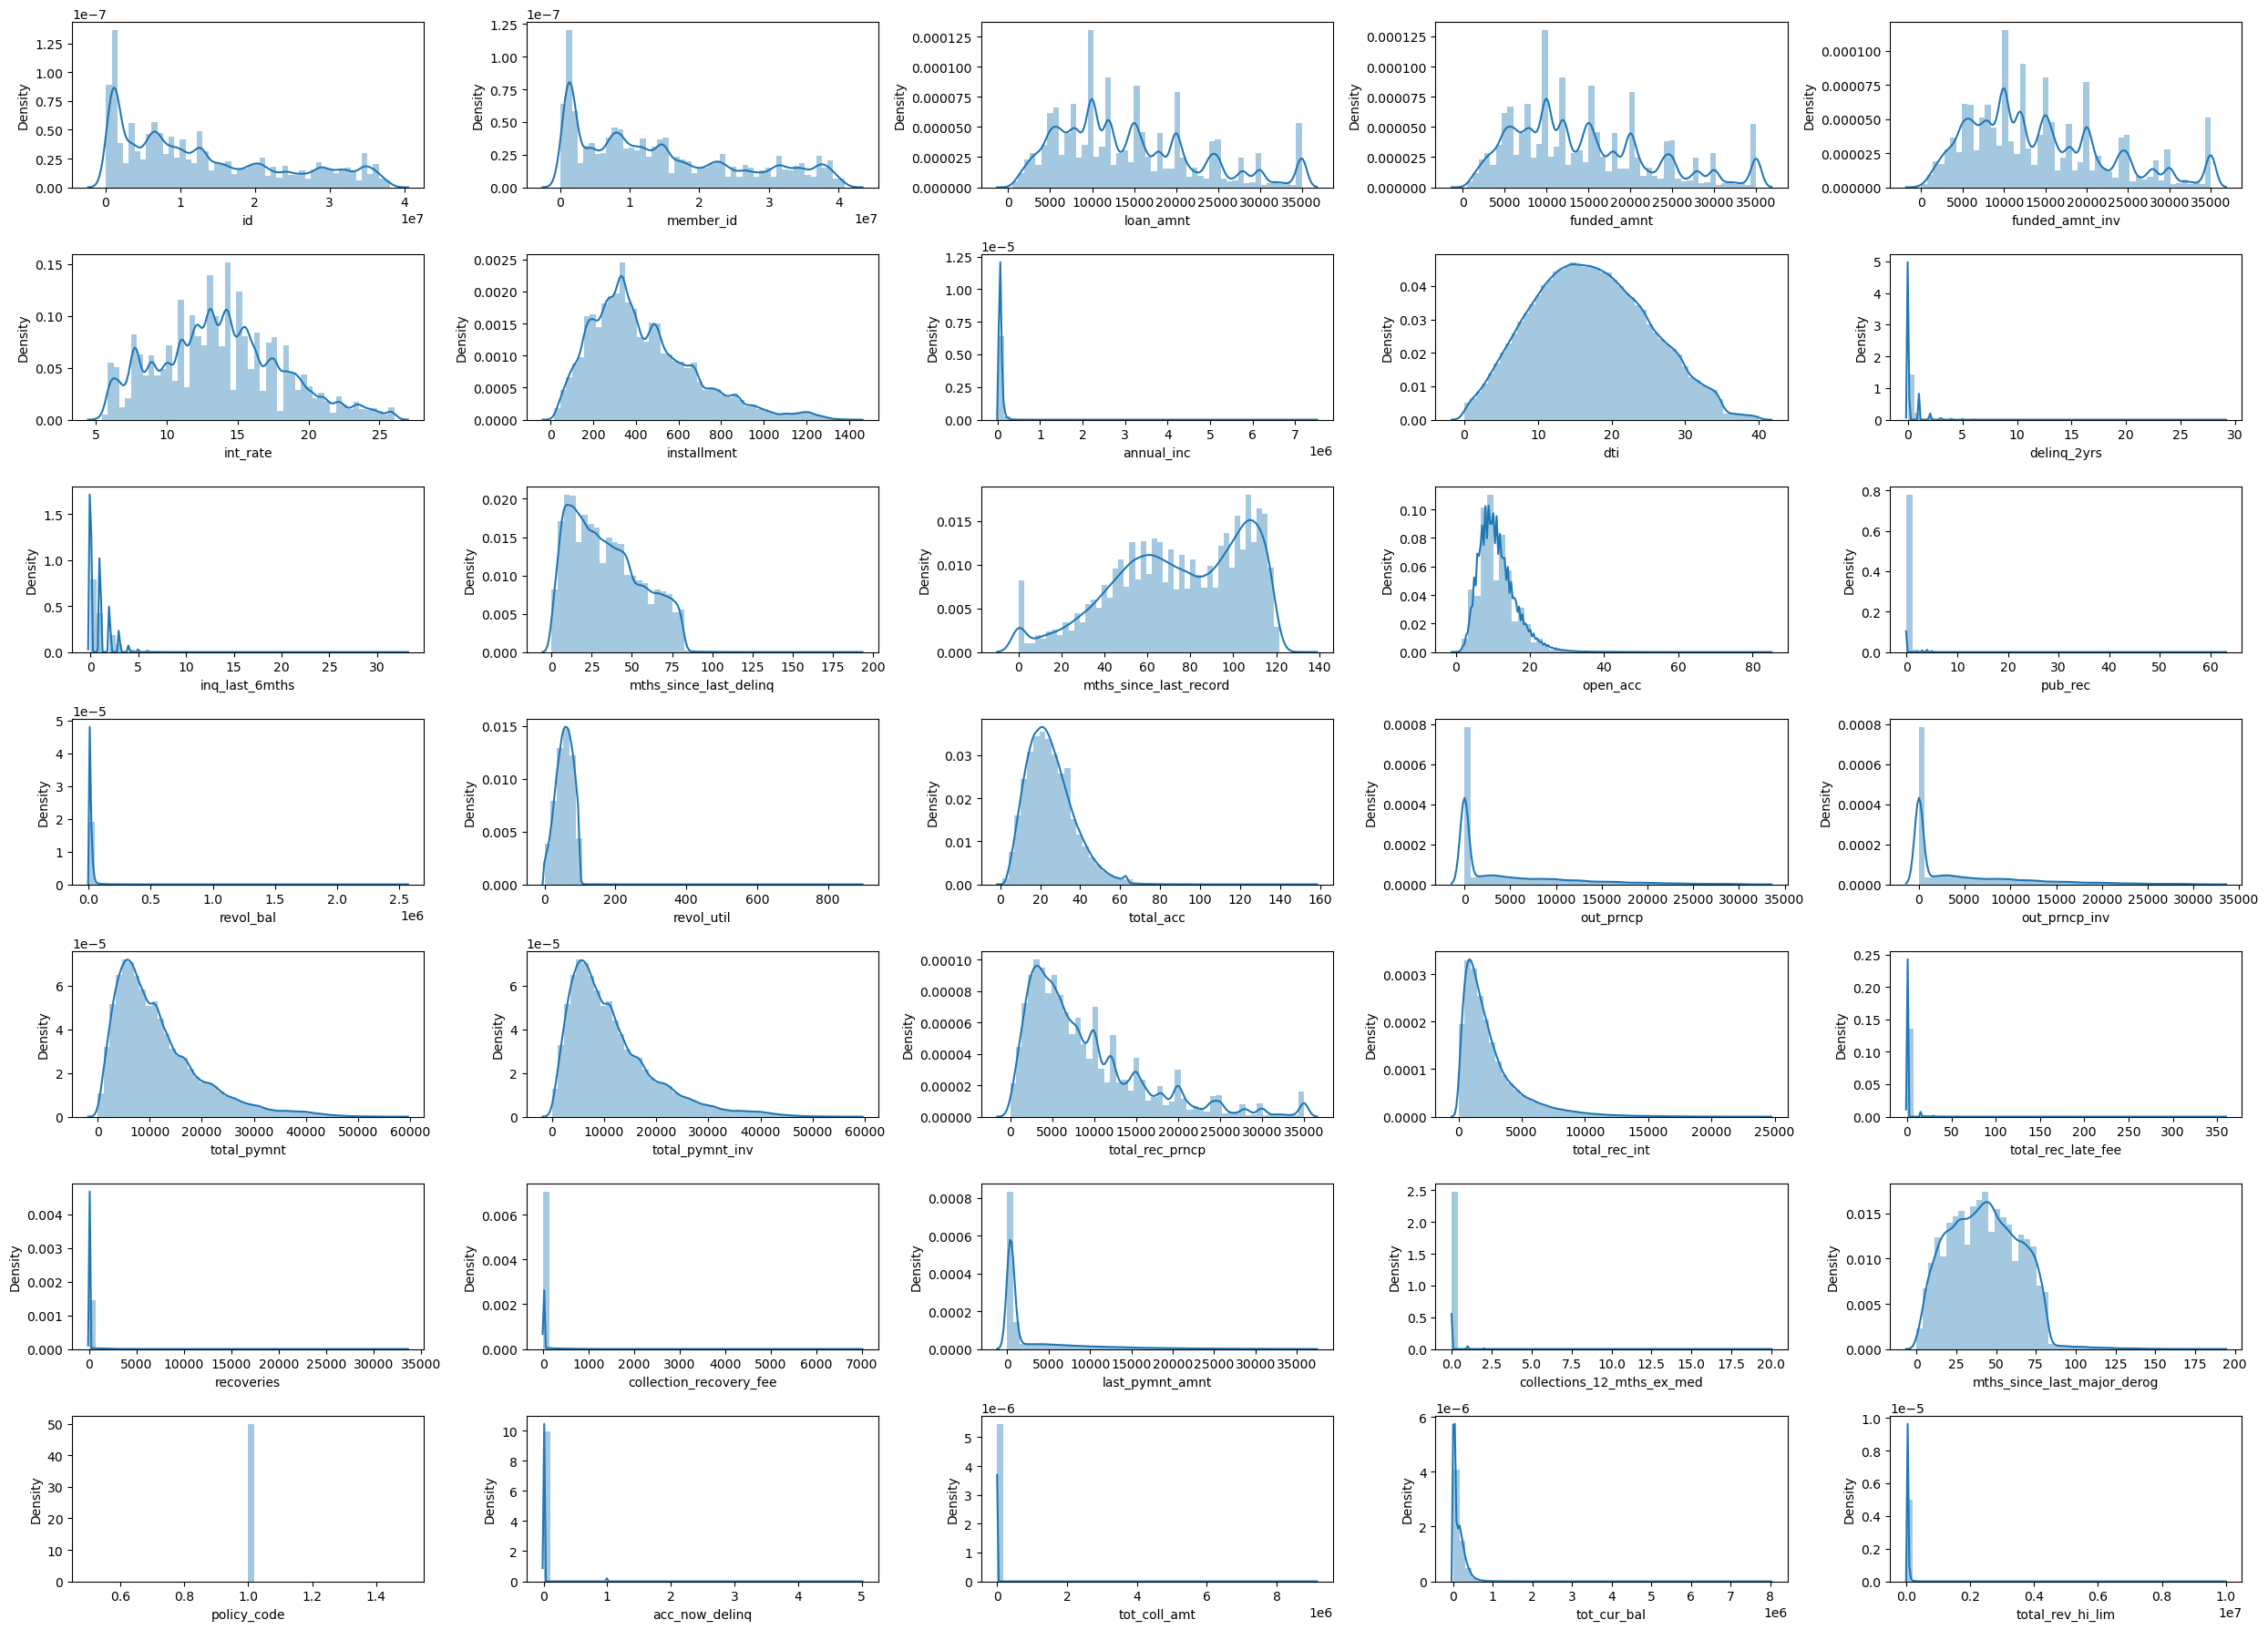

In [12]:
plt.figure(figsize=(25,18))

for i, col in enumerate(nums,1):
    plt.subplot(7,5, i)
    sns.distplot(df[col],kde=True)

plt.tight_layout()

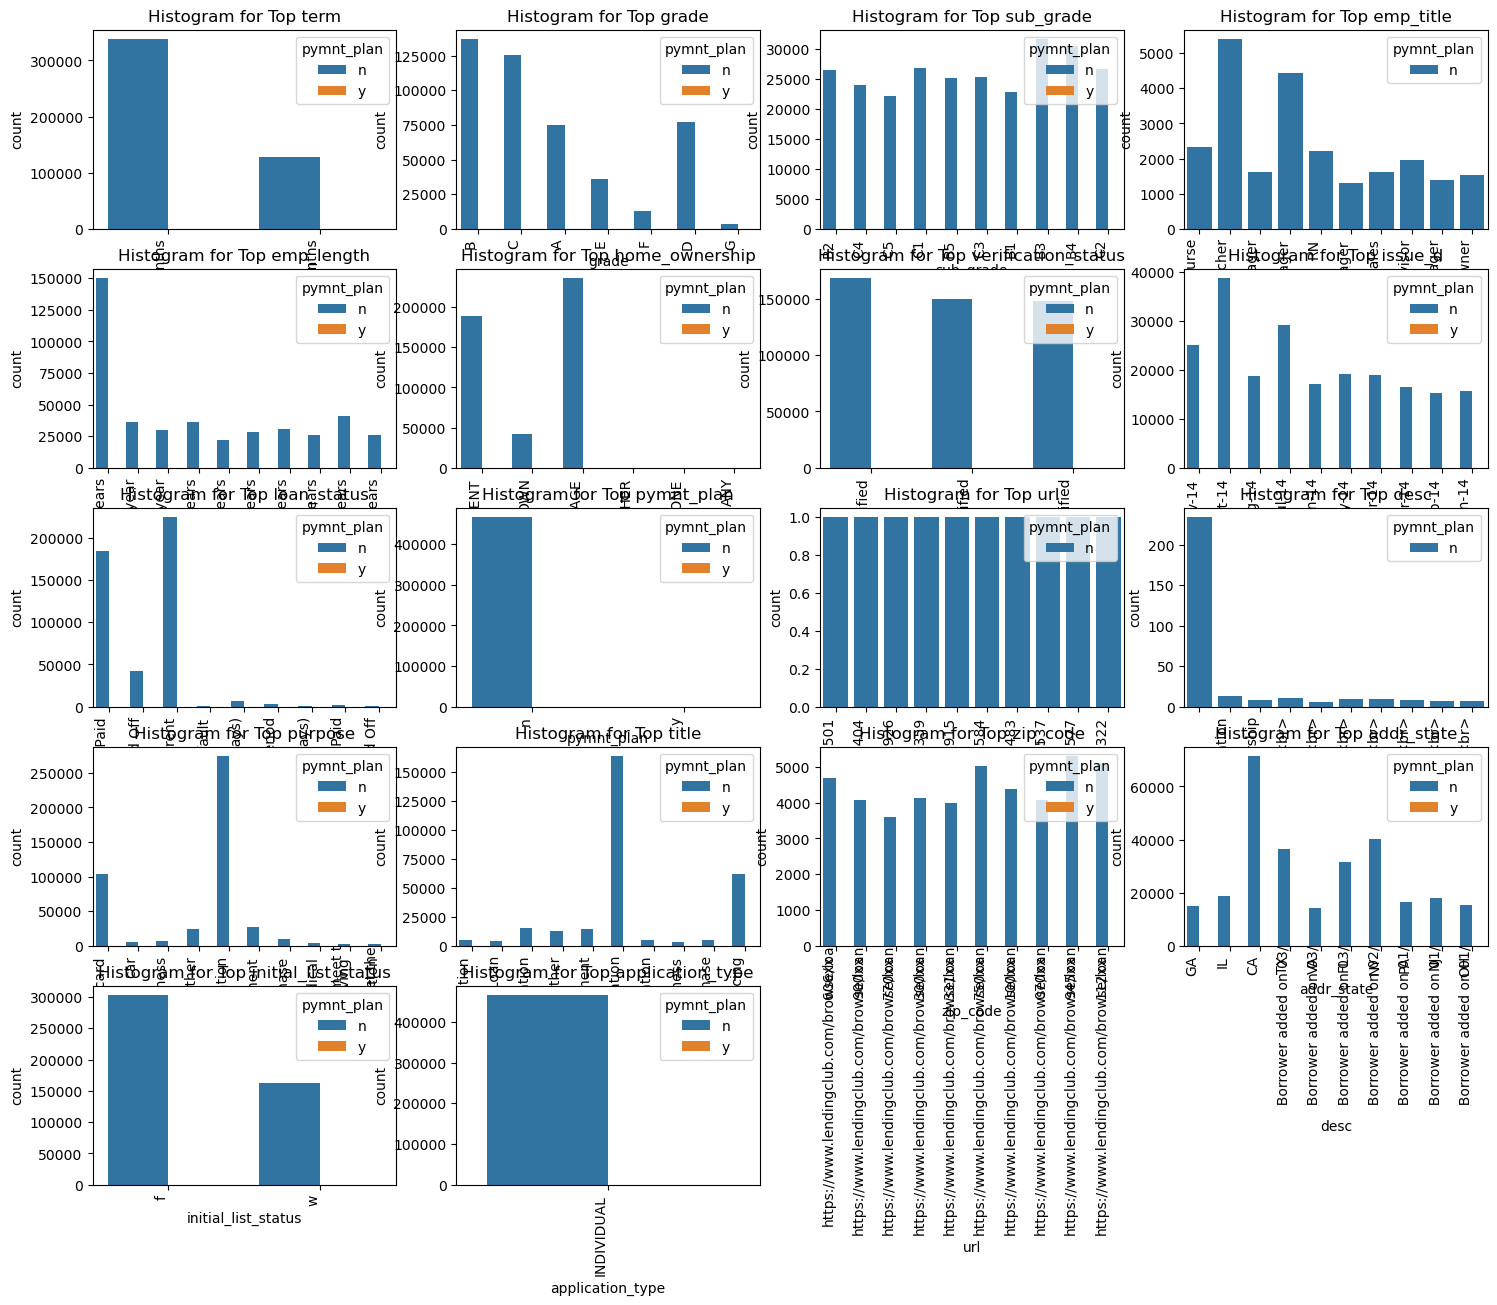

In [13]:
plt.figure(figsize=(18,15))


for i, col in enumerate(cats, 1):
    plt.subplot(5, 4, i)
    top_values = df[col].value_counts().nlargest(10).index
    sns.countplot(data=df[df[col].isin(top_values)], x=col,hue='pymnt_plan')
    plt.title(f'Histogram for Top {col}')
    plt.xticks(rotation=90, ha='right')    
plt.tight_layout()
plt.show()

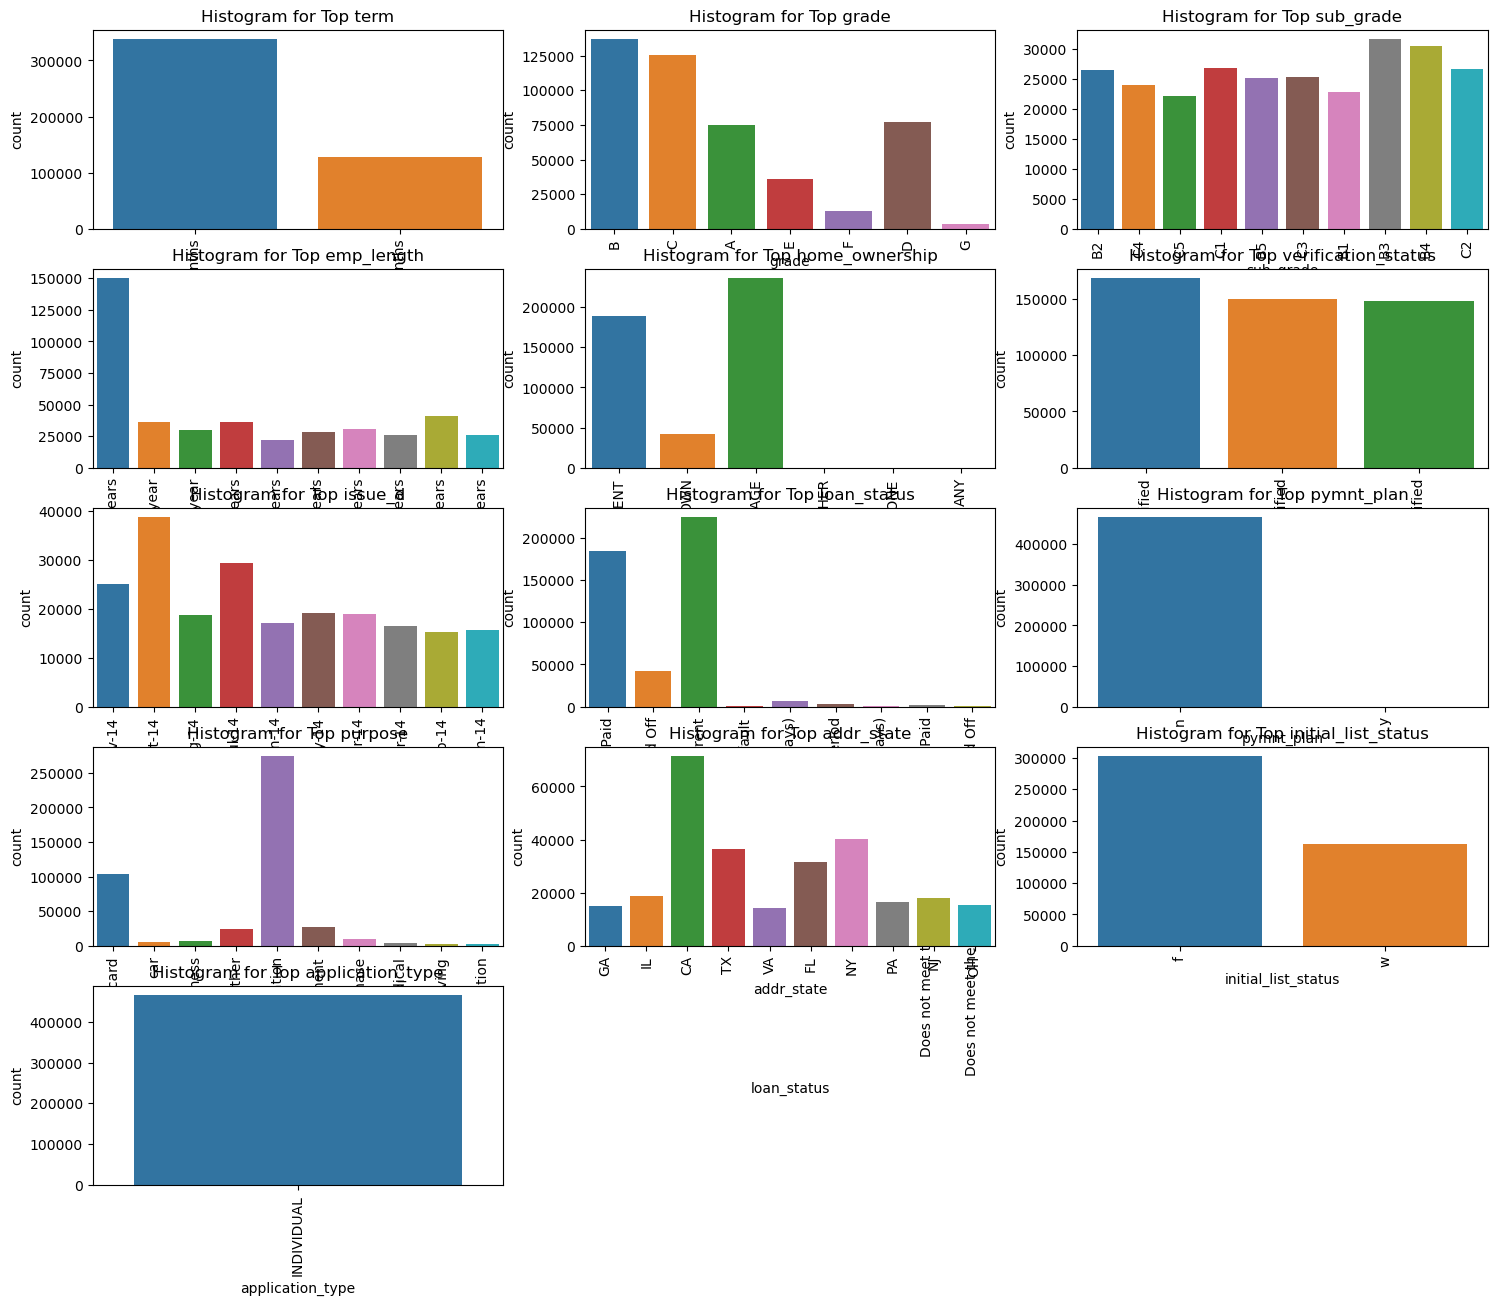

In [14]:
plt.figure(figsize=(18,15))


for i, col in enumerate(cats_2, 1):
    plt.subplot(5, 3, i)
    top_values = df[col].value_counts().nlargest(10).index
    sns.countplot(data=df[df[col].isin(top_values)], x=col)
    plt.title(f'Histogram for Top {col}')
    plt.xticks(rotation=90)    
plt.tight_layout(pad=3)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [16]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [17]:
df.nunique()

id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124435
purpose                            14
title                           63098
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs                        24
earliest_cr_

In [18]:
# sns.pairplot(data=df,diag_kind='pymnt_plan')

<Axes: >

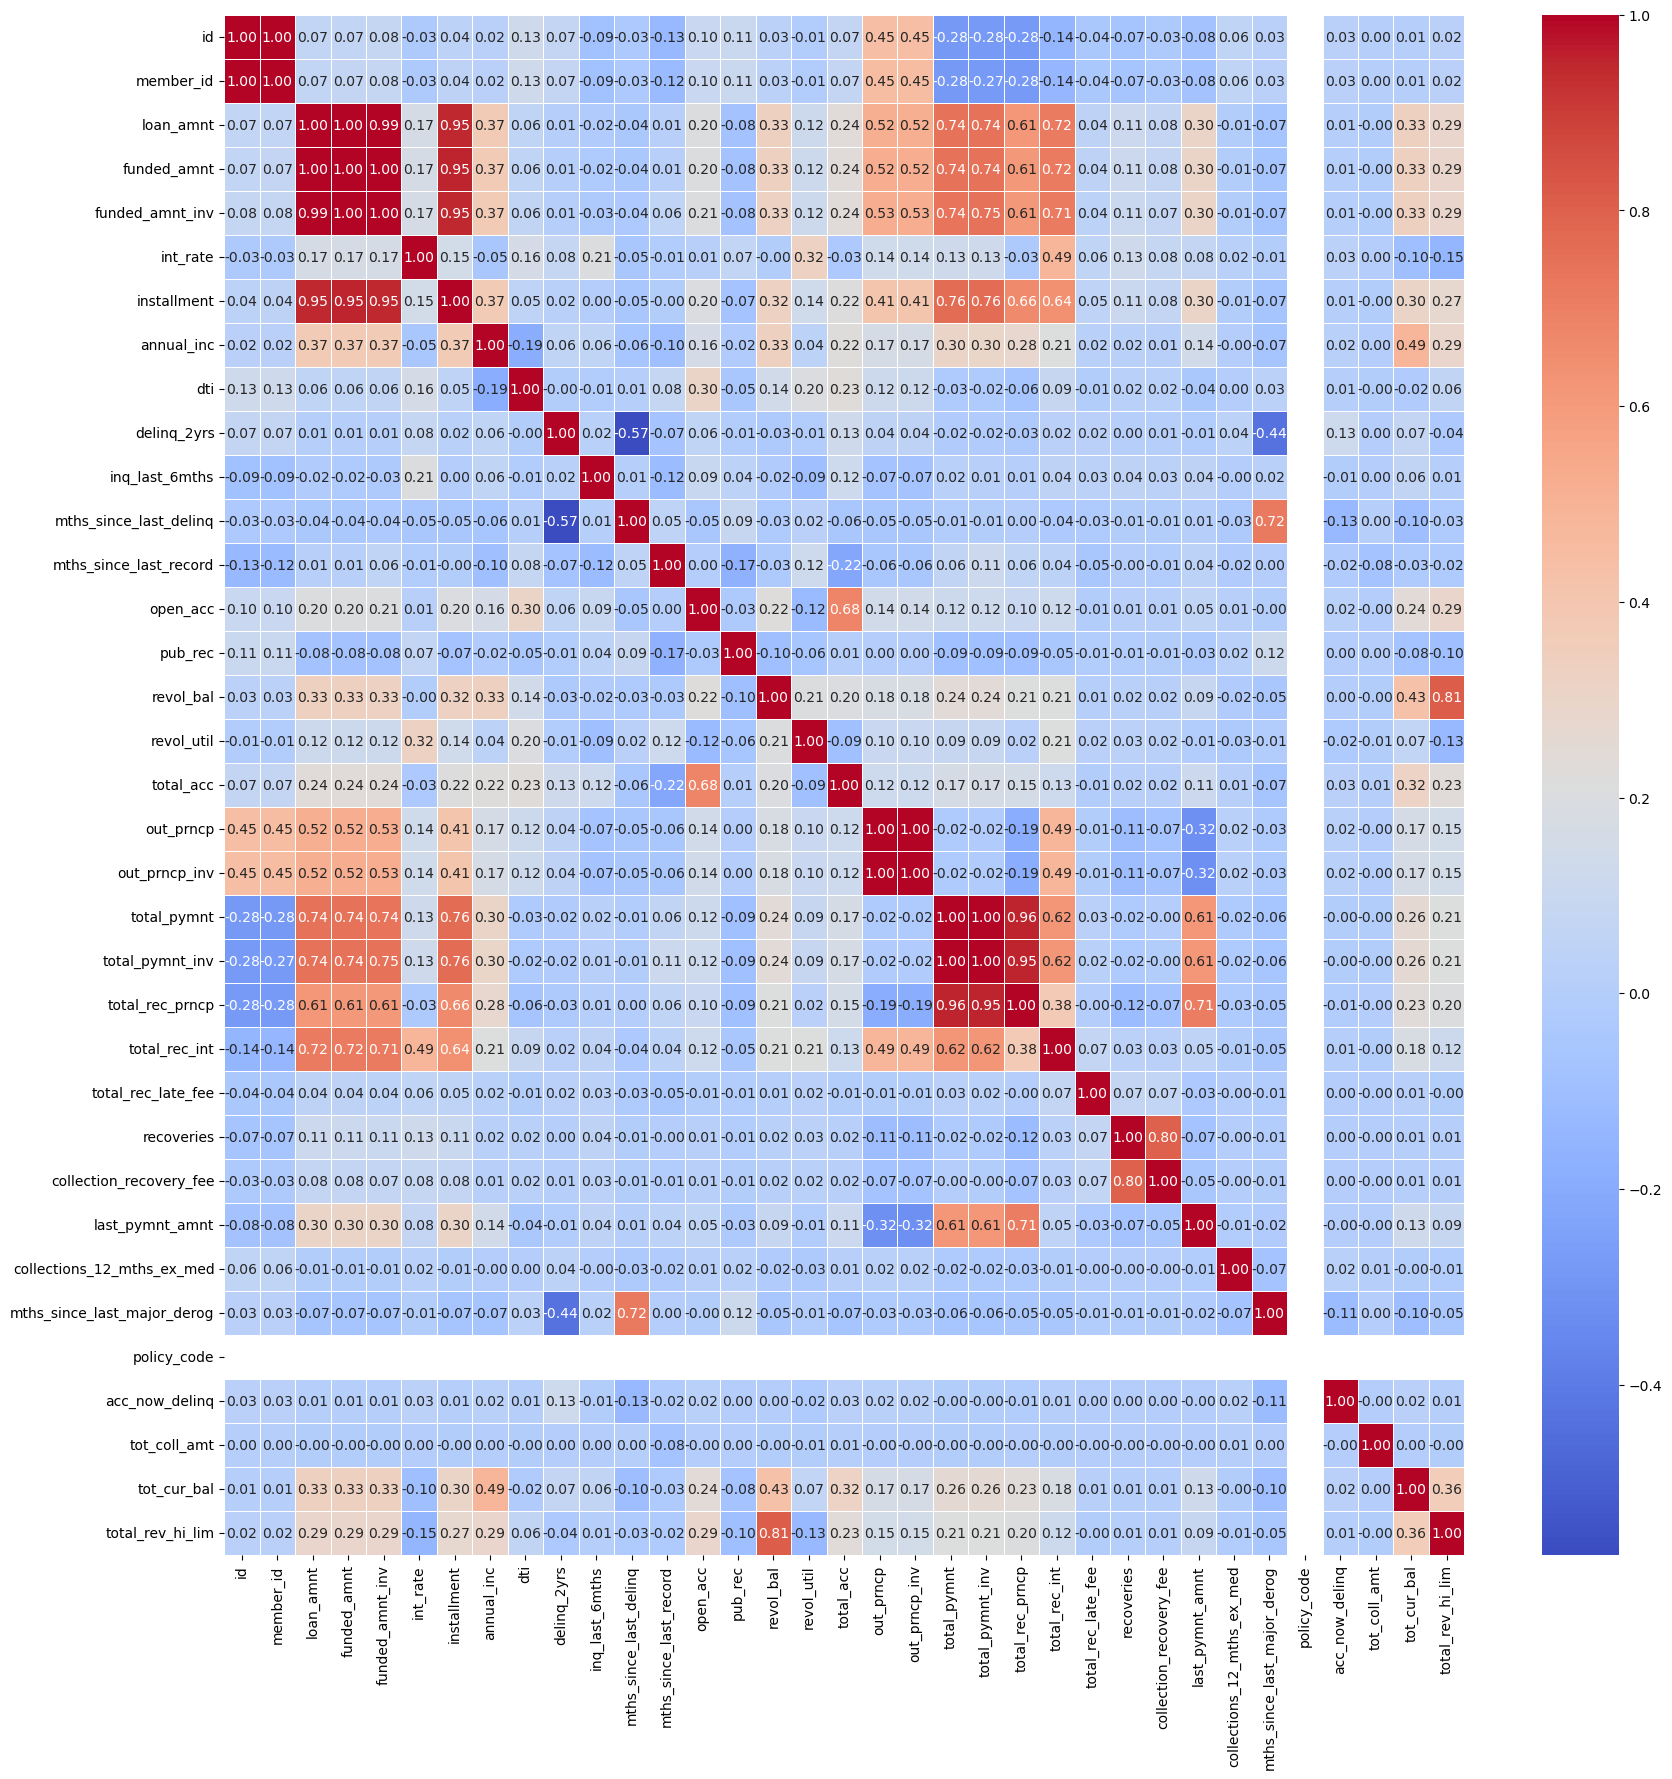

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)

# Data Pre Processing

In [20]:
missing_count = df.isna().sum()

In [21]:
(missing_count / len(df)) * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.916553
emp_length                      4.505399
home_ownership                  0.000000
annual_inc                      0.000858
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           72.981975
purpose                         0.000000
title                           0.004504
zip_code                        0.000000
addr_state                      0.000000
dti             

## Handle Missing Values

**Missing Values Kolom Numerik**

In [22]:
percent_missing_nums = df[nums].isna().sum() / len(df) * 100
percent_missing_nums

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
int_rate                        0.000000
installment                     0.000000
annual_inc                      0.000858
dti                             0.000000
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
mths_since_last_delinq         53.690554
mths_since_last_record         86.566585
open_acc                        0.006219
pub_rec                         0.006219
revol_bal                       0.000000
revol_util                      0.072917
total_acc                       0.006219
out_prncp                       0.000000
out_prncp_inv                   0.000000
total_pymnt                     0.000000
total_pymnt_inv                 0.000000
total_rec_prncp                 0.000000
total_rec_int                   0.000000
total_rec_late_f

In [23]:
# Langkah 1: Drop baris dengan nilai kosong di bawah 10%
columns_to_dropna = percent_missing_nums[percent_missing_nums < 10].index.tolist()
df.dropna(subset=columns_to_dropna, inplace=True)

In [24]:
# Langkah 2: Handle nilai kosong dengan mean untuk kolom dengan 10% hingga kurang dari 50%
columns_to_fill_mean = percent_missing_nums[(percent_missing_nums >= 10) & (percent_missing_nums < 50)].index.tolist()
df[columns_to_fill_mean] = df[columns_to_fill_mean].fillna(df[columns_to_fill_mean].mean())

In [25]:
# Langkah 3: Hapus kolom jika nilai kosong 50% atau lebih
columns_to_drop_entirely = percent_missing_nums[percent_missing_nums >= 50].index.tolist()
df.drop(columns=columns_to_drop_entirely, inplace=True)

**Missing Values Kolom Katerorik**

In [26]:
percent_missing_cats = df[cats].isna().sum() / len(df) * 100
percent_missing_cats

term                    0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.913076
emp_length              4.507204
home_ownership          0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
pymnt_plan              0.000000
url                     0.000000
desc                   73.004860
purpose                 0.000000
title                   0.004508
zip_code                0.000000
addr_state              0.000000
initial_list_status     0.000000
application_type        0.000000
dtype: float64

In [27]:
# Langkah 1: Drop baris dengan nilai kosong di bawah 10%
columns_to_dropna = percent_missing_cats[(percent_missing_cats > 0) & (percent_missing_cats < 10)].index.tolist()
df.dropna(subset=columns_to_dropna, inplace=True)

In [28]:
# Langkah 2: Handle nilai kosong dengan mode untuk kolom dengan 10% hingga kurang dari 50%
columns_to_fill_mode = percent_missing_cats[(percent_missing_cats >= 10) & (percent_missing_cats < 50)].index.tolist()
for col in columns_to_fill_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [29]:
# Langkah 3: Hapus kolom jika nilai kosong 50% atau lebih
columns_to_drop_entirely = percent_missing_cats[percent_missing_cats >= 50].index.tolist()
df.drop(columns=columns_to_drop_entirely, inplace=True)

**Handle Missing Values Kolom Times**

In [30]:
df[times].isna().sum() / len(df) * 100

earliest_cr_line       0.000000
last_pymnt_d           0.077611
next_pymnt_d          48.886971
last_credit_pull_d     0.007989
dtype: float64

In [31]:
for col in times:
    if col in df[times]:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

In [32]:
df.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

## Cek Duplikat

In [33]:
df.duplicated().sum()

0

In [34]:
df['id'].duplicated().sum()

0

## Handle Outliers

In [35]:
nums_2 = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 
          'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 
          'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
          'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 
          'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

In [36]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

def handle_outliers(df, nums_2):
    for col in nums_2:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)

        filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit))
        df_prep = df[filtered_entries]

    return df_prep

df_prep = handle_outliers(df, nums_2)

print(f'Jumlah baris setelah memfilter outlier: {len(df_prep)}')

Jumlah baris sebelum memfilter outlier: 438084
Jumlah baris setelah memfilter outlier: 407344


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438084 entries, 1 to 466283
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          438084 non-null  int64  
 1   member_id                   438084 non-null  int64  
 2   loan_amnt                   438084 non-null  int64  
 3   funded_amnt                 438084 non-null  int64  
 4   funded_amnt_inv             438084 non-null  float64
 5   term                        438084 non-null  object 
 6   int_rate                    438084 non-null  float64
 7   installment                 438084 non-null  float64
 8   grade                       438084 non-null  object 
 9   sub_grade                   438084 non-null  object 
 10  emp_title                   438084 non-null  object 
 11  emp_length                  438084 non-null  object 
 12  home_ownership              438084 non-null  object 
 13  annual_inc         

# Feature Extraction

In [38]:
df_prep.select_dtypes(include=['object']).head(3)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,...,car,bike,309xx,GA,Apr-99,f,Apr-13,Feb-16,Sep-13,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,...,other,personel,917xx,CA,Feb-96,f,Jan-15,Feb-16,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,...,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


In [39]:
df_prep.select_dtypes(include=['object']).nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              194736
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    89
loan_status                 9
pymnt_plan                  2
url                    407344
purpose                    14
title                   57015
zip_code                  884
addr_state                 50
earliest_cr_line          643
initial_list_status         2
last_pymnt_d               98
next_pymnt_d               99
last_credit_pull_d        100
application_type            1
dtype: int64

Dalam fitur kategorikal, terdapat fitur dengan nilai unik yang merepresentasikan tanggal/waktu:

Issue_d: 89

Earliest_cr_line: 647

Last_pymnt_d: 98

Next_pymnt_d: 99

Last_credit_pull_d: 100

Fitur-fitur akan diubah menjadi fitur numerik yang merepresentasikan komponen tanggal seperti tahun, bulan, atau hari

In [40]:
df_prep[['issue_d','earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']].sample(5)

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
200665,Sep-12,Aug-01,May-15,Feb-16,Dec-15
253193,Nov-14,Jun-97,Jan-16,Feb-16,Jan-16
269313,Oct-14,Mar-06,Dec-15,Jan-16,Jan-16
206510,Aug-12,Jun-09,Jun-15,Feb-16,Jan-16
34366,Nov-09,Jun-96,Jun-12,Feb-16,Apr-15


In [41]:
df_prep['issue_d'] = pd.to_datetime(df_prep['issue_d'], format='%b-%y').dt.month
df_prep['earliest_cr_line'] = pd.to_datetime(df_prep['earliest_cr_line'], format='%b-%y').dt.month
df_prep['last_pymnt_d'] = pd.to_datetime(df_prep['last_pymnt_d'], format='%b-%y').dt.month
df_prep['next_pymnt_d'] = pd.to_datetime(df_prep['next_pymnt_d'], format='%b-%y').dt.month
df_prep['last_credit_pull_d'] = pd.to_datetime(df_prep['last_credit_pull_d'], format='%b-%y').dt.month


df_prep[['issue_d','earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']].sample(5)

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
215197,6,9,11,2,1
129950,6,8,2,2,1
707,12,1,2,2,8
88697,9,8,5,2,1
305928,9,8,11,2,7


In [42]:
df_prep['home_ownership'].value_counts()

home_ownership
MORTGAGE    200051
RENT        173097
OWN          33981
OTHER          172
NONE            42
ANY              1
Name: count, dtype: int64

Dalam kolom di atas, dilakukan pengelompokkan untuk kolom **OTHER, NONE, ANY** menjadi **OTHER**

In [43]:
# Menggabungkan kategori 'OTHER', 'NONE', dan 'ANY' menjadi 'OTHER'
df_prep['home_ownership'] = df_prep['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

# Memeriksa nilai unik dan jumlah kemunculan setelah pengelompokkan
df_prep['home_ownership'].value_counts()

home_ownership
MORTGAGE    200051
RENT        173097
OWN          33981
OTHER          215
Name: count, dtype: int64

In [44]:
def categorize_emp_length(length):
    if length == '10+ years':
        return '10+ years'
    elif length == '< 1 year':
        return '< 1 year'
    else:
        return '1-9 years'

# Terapkan fungsi ke kolom emp_length
df_prep['emp_length'] = df_prep['emp_length'].apply(categorize_emp_length)
df_prep['emp_length'].value_counts()

emp_length
1-9 years    240604
10+ years    133158
< 1 year      33582
Name: count, dtype: int64

# Feature Encoding

In [45]:
df_prep.select_dtypes(include=['object']).head(3)
# df_encode.select_dtypes(include=['object']).head(3)

NameError: name 'df_encode' is not defined

Berdasarkan jumlah nilai unik (nunique) dari fitur-fitur kategorikal di atas, fitur dengan nilai unik yang sedikit (kecil atau sedang) yang akan dilakukan encoding

In [46]:
df_prep['term'] = df_prep['term'].str.extract('(\d+)').astype(int)

In [47]:
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 
                 'D': 4, 'E': 5, 'F': 6, 'G': 7}

#This pymnt_plan Indicates if a payment plan has been put in place for the loan (n/y)
pymnt_plan_mapping = {'n':0,
                     'y':1}

#The initial listing status of the loan. Possible values are – Whole, Fractional
initial_list_status_mapping = {'w' : 0,
                              'f' : 1}

# Melakukan pemetaan menggunakan map
df_prep['grade'] = df_prep['grade'].map(grade_mapping)
df_prep['pymnt_plan'] = df_prep['pymnt_plan'].map(pymnt_plan_mapping)
df_prep['initial_list_status'] = df_prep['initial_list_status'].map(initial_list_status_mapping)

In [48]:
# column_to_OHE = df_prep[['home_ownership', 'verification_status','loan_status', 'application_type']]
# column_to_OHE.nunique()

In [49]:
# column_to_OHE.head()

In [50]:
encode1 = pd.get_dummies(df_prep['home_ownership'], prefix = 'home_ownership')
encode2 = pd.get_dummies(df_prep['verification_status'], prefix = 'verification_status')
encode3 = pd.get_dummies(df_prep['loan_status'], prefix = 'loan_status')
encode4 = pd.get_dummies(df_prep['application_type'], prefix = 'application_type')
encode5 = pd.get_dummies(df_prep['emp_length'], prefix = 'emp_length')



In [52]:
concat = pd.concat([df_prep, encode1, encode2, encode3, encode4,encode5], axis=1)
df_encode = concat.drop(columns=['home_ownership','verification_status','loan_status','application_type','emp_length'])

df_encode

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),application_type_INDIVIDUAL,emp_length_1-9 years,emp_length_10+ years,emp_length_< 1 year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3,C4,...,False,False,False,False,False,False,True,False,False,True
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,3,C1,...,False,False,True,False,False,False,True,False,True,False
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,2,B5,...,False,False,False,False,False,False,True,True,False,False
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,1,A4,...,False,False,True,False,False,False,True,True,False,False
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,3,C5,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466279,9745484,11597572,15000,15000,15000.0,36,13.53,509.25,2,B5,...,False,False,False,False,False,False,True,True,False,False
466280,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,3,C2,...,False,False,False,False,False,False,True,True,False,False
466281,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,4,D5,...,False,False,False,False,False,False,True,False,True,False
466282,9584776,11436914,20700,20700,20700.0,60,16.99,514.34,4,D1,...,False,False,False,False,False,False,True,True,False,False


In [53]:
#Mengubah tipe boolean menjadi numeric

df_encode[df_encode.select_dtypes(include='bool').columns] = df_encode.select_dtypes(include='bool').astype(int)
df_encode.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),application_type_INDIVIDUAL,emp_length_1-9 years,emp_length_10+ years,emp_length_< 1 year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3,C4,...,0,0,0,0,0,0,1,0,0,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,3,C1,...,0,0,1,0,0,0,1,0,1,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,2,B5,...,0,0,0,0,0,0,1,1,0,0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,1,A4,...,0,0,1,0,0,0,1,1,0,0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,3,C5,...,0,0,0,0,0,0,1,1,0,0


In [60]:
df_encode.select_dtypes(include='object').nunique()

sub_grade         35
emp_title     194736
url           407344
purpose           14
title          57015
zip_code         884
addr_state        50
dtype: int64

In [66]:
df_encode.drop(columns=['sub_grade', 'emp_title', 'url', 'purpose', 'title', 'zip_code',
       'addr_state'],inplace=True)
df_encode.head(3)

KeyError: "['sub_grade', 'emp_title', 'url', 'purpose', 'title', 'zip_code', 'addr_state'] not found in axis"

In [65]:
df_encode['sub_grade']

KeyError: 'sub_grade'